In [ ]:
 import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/python/review.xlsx')

In [ ]:
headers = {'user-agent':  'Mozilla/5.0'}
reviewlist = []

def get_soup(url):
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            "review_name" : item.find('span', {'class': 'a-profile-name'}).text.strip(),
            "review_product": soup.title.text.replace('Amazon.com: Customer reviews:', '').strip(),
            "review_title" : item.find('a', {'data-hook': 'review-title'}).text.strip(),
            "review_rating" : float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            "review_text" : item.find('span', {'data-hook': 'review-body'}).text.strip(),
            "review_date" : item.find('span', {'data-hook': 'review-date'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
df_corpus = pd.DataFrame(df, columns=['review_text'])

In [ ]:
df_corpus['review_text_processed'] = df_corpus['review_text'].apply(lambda x: re.sub(r'[^(a-z|A-Z|)]', ' ', str(x)))
df_corpus['review_text_processed'] = df_corpus['review_text_processed'].apply(lambda x: x.lower())
df_corpus['review_text_lenmatize'] = df_corpus['review_text_processed'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df_corpus['review_text_word_token'] = df_corpus['review_text_lenmatize'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in (stop_words)))

In [ ]:
df_corpus

,review_text,review_text_processed,review_text_lenmatize,review_text_word_token
0,I'd say this is worth the money if you like Pu...,i d say this is worth the money if you like pu...,i d say this is worth the money if you like pu...,say worth money like pumpkin spice considering...
1,A coffee pod will never compare favorably to f...,a coffee pod will never compare favorably to f...,a coffee pod will never compare favorably to f...,coffee pod never compare favorably freshly gro...
2,In under 24 hours I was sent Cinnamon Dulce La...,in under hours i was sent cinnamon dulce la...,in under hour i wa sent cinnamon dulce latte p...,hour wa sent cinnamon dulce latte pod seattle ...
3,Always good. What more csn be said. Never had ...,always good what more csn be said never had ...,always good what more csn be said never had a ...,always good csn said never problem ordering dr...
4,I’m not a huge fan of keurig machines but that...,i m not a huge fan of keurig machines but that...,i m not a huge fan of keurig machine but that ...,huge fan keurig machine use work generally fin...
...,...,...,...,...
11526,I ordered this product on 10/17/2022; best bef...,i ordered this product on best bef...,i ordered this product on best before read more,ordered product best read
11527,This has been my favorite flavor of coffee fro...,this has been my favorite flavor of coffee fro...,this ha been my favorite flavor of coffee from...,ha favorite flavor coffee starbucks tasty im read
11528,The package arrived flat and crushed - but tha...,the package arrived flat and crushed but tha...,the package arrived flat and crushed but that ...,package arrived flat crushed wa important impo...
11529,It will expire in 2 months. Are you serious? I...,it will expire in months are you serious i...,it will expire in month are you serious i wa e...,expire month serious wa expected drink least h...


In [ ]:
#count num_charr
df['num_char'] = df_corpus['review_text'].str.len()
df['num_char']

0        406
1        244
2        988
3        174
4        664
        ... 
11526     71
11527     81
11528    285
11529    141
11530     89
Name: num_char, Length: 11531, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7efd2ff78710>,
 'caps': [<matplotlib.lines.Line2D at 0x7efd2ff04390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efd2fef7350>],
 'medians': [<matplotlib.lines.Line2D at 0x7efd2ff04e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efd2fee6890>],
 'means': []}

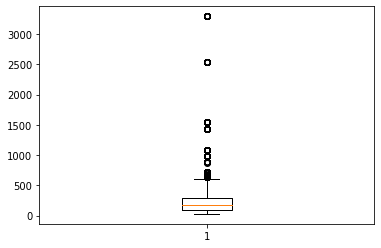

In [ ]:
plt.boxplot(df['num_char'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7efd302a52d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efd2d1c6d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efd2d1cbcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efd2d1ec810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efd2d1ecd50>],
 'means': []}

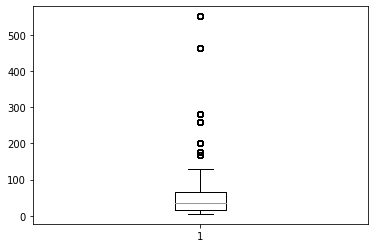

In [ ]:
#count_num_words
df['count'] = df['review_text'].str.split().str.len()
df['count']
plt.boxplot(df['count'])

In [ ]:
c= df['count'].astype(int) > 21
c

0         True
1         True
2         True
3         True
4         True
         ...  
11526    False
11527    False
11528     True
11529     True
11530    False
Name: count, Length: 11531, dtype: bool

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
review = df_corpus['review_text_word_token']

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
response = tfidf.fit_transform(df_corpus['review_text_word_token'])


In [ ]:
print("Feature Names n", tfidf.get_feature_names_out())
print("Sparse Matrix n", response.shape, "n", response.toarray())

Feature Names n ['abernook' 'able' 'absolute' ... 'year' 'yes' 'yet']
Sparse Matrix n (11531, 1022) n [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.21379069 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
df_results = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names_out())

In [ ]:
df_results

,abernook,able,absolute,absolutely,abundance,abused,access,accustomed,acidic,actually,...,world,worn,worried,worse,worth,would,wrong,year,yes,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.14379,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.082806,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0
11527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0
11528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0
11529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.213791,0.0,0.0


In [ ]:
df_results.describe()

,abernook,able,absolute,absolutely,abundance,abused,access,accustomed,acidic,actually,...,world,worn,worried,worse,worth,would,wrong,year,yes,yet
count,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,...,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000
mean,0.000543,0.000022,0.003832,0.008848,0.001984,0.000294,0.000294,0.000976,0.001555,0.000012,...,0.000294,0.000015,0.002356,0.000632,0.006141,0.014042,0.011351,0.026193,0.001493,0.010337
std,0.007275,0.002374,0.034695,0.051125,0.014122,0.003936,0.003936,0.013281,0.015282,0.001274,...,0.003936,0.001563,0.027019,0.008591,0.035587,0.057854,0.065846,0.066945,0.010381,0.044459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.097913,0.254879,0.317911,0.338845,0.119271,0.052975,0.052975,0.181606,0.172440,0.136853,...,0.052975,0.167855,0.312223,0.117470,0.325502,0.304719,0.451597,0.309274,0.076256,0.261305


In [ ]:
def fit(self, X, y=None):
      
        if not sp.issparse(X):
            X = sp.csc_matrix(X)
        if self.use_idf:
            n_samples, n_features = X.shape
            df = _document_frequency(X)

            # perform idf smoothing if required
            df += int(self.smooth_idf)
            n_samples += int(self.smooth_idf)

            # log+1 instead of log makes sure terms with zero idf don't get
            # suppressed entirely.
            idf = np.log(float(n_samples) / df) + 1.0
            self._idf_diag = sp.spdiags(idf, diags=0, m=n_features,
                                        n=n_features, format='csr')

        return self

def transform(self, X, copy=True):
       
        if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.floating):
            # preserve float family dtype
            X = sp.csr_matrix(X, copy=copy)
        else:
            # convert counts or binary occurrences to floats
            X = sp.csr_matrix(X, dtype=np.float64, copy=copy)

        n_samples, n_features = X.shape

        if self.sublinear_tf:
            np.log(X.data, X.data)
            X.data += 1

        if self.use_idf:
            check_is_fitted(self, '_idf_diag', 'idf vector is not fitted')

            expected_n_features = self._idf_diag.shape[0]
            if n_features != expected_n_features:
                raise ValueError("Input has n_features=%d while the model"
                                 " has been trained with n_features=%d" % (
                                     n_features, expected_n_features))
            # *= doesn't work
            X = X * self._idf_diag

        if self.norm:
            X = normalize(X, norm=self.norm, copy=False)

        return X

In [ ]:
print(response)

  (0, 745)	0.03304400898177967
  (0, 454)	0.12827953777061793
  (0, 783)	0.14172892179344962
  (0, 362)	0.12410455286565399
  (0, 868)	0.1595175781438341
  (0, 554)	0.11238627285322213
  (0, 895)	0.1300121861014898
  (0, 212)	0.1415755850497057
  (0, 32)	0.12239158950217269
  (0, 237)	0.1595175781438341
  (0, 831)	0.1595175781438341
  (0, 551)	0.12797404398626883
  (0, 506)	0.12330290686400491
  (0, 337)	0.15201263274721144
  (0, 635)	0.10716177385577469
  (0, 403)	0.08663570516371817
  (0, 319)	0.13775162319610468
  (0, 524)	0.12916076356672918
  (0, 395)	0.12916076356672918
  (0, 419)	0.19382962290159828
  (0, 762)	0.13407986839864178
  (0, 556)	0.14732599449523037
  (0, 775)	0.1595175781438341
  (0, 172)	0.09698935729628828
  (0, 223)	0.3216474344848017
  :	:
  (11528, 172)	0.1494912970259063
  (11529, 633)	0.32683542012787653
  (11529, 542)	0.32702299946461
  (11529, 433)	0.3081900224875253
  (11529, 316)	0.3275885712503
  (11529, 814)	0.3275885712503
  (11529, 322)	0.3275885712503

In [ ]:
two_columns= df['review_rating'];
corpus_two = [];
b = []
for x in two_columns:
  corpus_two.append(x)
for doc in corpus_two:
  if doc == 1.0 or doc == 2.0:
    b.append("-1")
  elif doc == 3.0:
    b.append("0")
  else:
    b.append("1")
s2 = pd.Series(b,index=df.index)
df['label_rating'] = s2



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11531 entries, 0 to 11530
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_name     11531 non-null  object
 1   review_product  11531 non-null  object
 2   review_title    11531 non-null  object
 3   review_rating   11531 non-null  int64 
 4   review_text     11531 non-null  object
 5   review_date     11531 non-null  object
 6   num_char        11531 non-null  int64 
 7   count           11531 non-null  int64 
 8   label_rating    11531 non-null  object
dtypes: int64(3), object(6)
memory usage: 810.9+ KB


In [ ]:
df.describe()
#describe data: min rating: 4

,review_rating,num_char,count
count,11531.000000,11531.000000,11531.000000
mean,3.913624,297.002688,54.856907
std,1.582317,396.836299,70.411206
min,1.000000,28.000000,5.000000
25%,3.000000,89.000000,16.000000
50%,5.000000,177.000000,35.000000
75%,5.000000,298.000000,65.000000
max,5.000000,3295.000000,552.000000


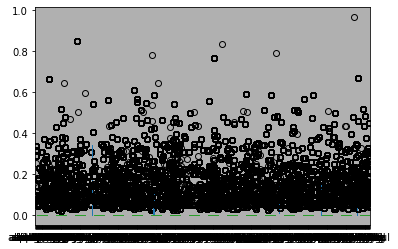

In [ ]:
import matplotlib.pyplot as plt
df_results.boxplot()


In [ ]:
df_results.corr()

,abernook,able,absolute,absolutely,abundance,abused,access,accustomed,acidic,actually,...,world,worn,worried,worse,worth,would,wrong,year,yes,yet
abernook,1.000000,-0.000696,-0.008252,-0.012930,-0.010496,-0.005581,-0.005581,-0.005493,-0.007600,-0.000696,...,-0.005581,-0.000696,-0.006514,-0.005493,-0.012892,-0.018133,-0.012880,-0.029232,-0.010745,-0.017371
able,-0.000696,1.000000,-0.001029,-0.001612,-0.001308,-0.000696,-0.000696,-0.000685,-0.000947,-0.000087,...,-0.000696,-0.000087,-0.000812,-0.000685,-0.001607,-0.002260,-0.001606,0.006828,-0.001339,-0.002165
absolute,-0.008252,-0.001029,1.000000,-0.019117,-0.015519,-0.008252,-0.008252,-0.008122,-0.011238,-0.001029,...,-0.008252,-0.001029,-0.009631,-0.008122,-0.019062,-0.026811,-0.019043,-0.043221,-0.015887,-0.025685
absolutely,-0.012930,-0.001612,-0.019117,1.000000,-0.024315,-0.012930,-0.012930,-0.012725,-0.017607,-0.001612,...,-0.012930,-0.001612,-0.015090,-0.012725,0.427557,-0.042008,-0.029837,-0.067718,-0.024891,-0.040243
abundance,-0.010496,-0.001308,-0.015519,-0.024315,1.000000,-0.010496,-0.010496,-0.010330,-0.014293,-0.001308,...,-0.010496,-0.001308,-0.012250,-0.010330,-0.024244,0.148229,-0.024221,-0.054972,0.382314,0.219745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
would,-0.018133,-0.002260,-0.026811,-0.042008,0.148229,0.061241,0.061241,-0.017846,-0.007061,-0.002260,...,0.061241,-0.002260,-0.021163,-0.017846,-0.041886,1.000000,-0.041846,-0.094973,0.037061,-0.011308
wrong,-0.012880,-0.001606,-0.019043,-0.029837,-0.024221,-0.012880,-0.012880,-0.012676,-0.017539,-0.001606,...,-0.012880,-0.001606,-0.015032,-0.012676,-0.029750,-0.041846,1.000000,-0.067457,-0.024795,-0.040087
year,-0.029232,0.006828,-0.043221,-0.067718,-0.054972,-0.029232,-0.029232,-0.028769,-0.039806,0.001979,...,-0.029232,0.003253,-0.034116,-0.028769,-0.067430,-0.094973,-0.067457,1.000000,-0.013504,0.309405
yes,-0.010745,-0.001339,-0.015887,-0.024891,0.382314,-0.010745,-0.010745,-0.010575,-0.014632,-0.001339,...,-0.010745,-0.001339,-0.012540,-0.010575,-0.024819,0.037061,-0.024795,-0.013504,1.000000,0.066192


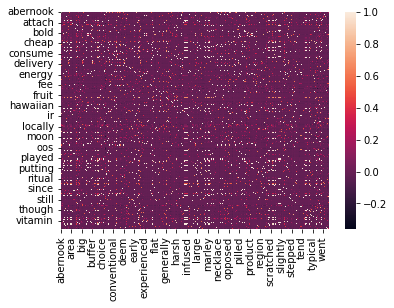

In [ ]:
import seaborn as sns
sns.heatmap(data = df_results.corr())

In [ ]:
kk = df['review_rating']
s = list(kk)



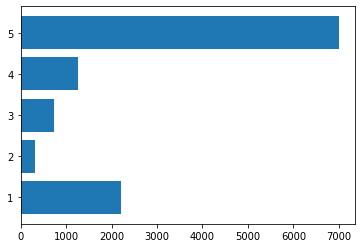

In [ ]:
a = s.count(5.0)
b = s.count(4.0)
c = s.count(3)
d = s.count(2)
e = s.count(1)
import matplotlib.pyplot as plt
import numpy as np
x = np.array(['1','2','3','4','5'])
y = np.array([e,d,c,b,a])
plt.barh(x,y)
plt.show()


In [ ]:
b

1256

In [ ]:
features = ['review_rating', 'label_rating']

PREDICT 

In [ ]:
X = df[features]
Y = df['review_rating']
X.head()

,review_rating,label_rating
0,5,1
1,5,1
2,5,1
3,5,1
4,4,1


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
Y.head()

0    5
1    5
2    5
3    5
4    4
Name: review_rating, dtype: int64

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor(random_state=1)

In [ ]:
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
Y_pre = dt_model.predict(X_valid.head())

In [ ]:
Y_pre

array([5., 5., 5., 5., 1.])

In [ ]:
pd.DataFrame({'Y' : Y_valid.head(), 'Y_pre' : Y_pre})

,Y,Y_pre
2958,5,5.0
5155,5,5.0
7362,5,5.0
3899,5,5.0
8833,1,1.0



LOGISTIC REGRESSION





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model.fit(X,Y)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X,Y)

In [ ]:
model.classes_

array([1, 2, 3, 4, 5])

In [ ]:
 model.intercept_

array([  6.21543781, -17.94472173,  -2.55163339,  14.98782802,
       -24.55674069])

In [ ]:
model.coef_

array([[-7.74026775e+00, -6.21546295e+00],
       [ 4.36150564e+00, -1.02942359e+01],
       [ 1.59835054e-02, -6.72550088e-01],
       [-7.22963045e+00,  1.65499305e+01],
       [ 6.90530839e+00, -5.58391010e+00]])

In [ ]:
model.predict_proba(X)

array([[1.49616288e-17, 1.54502189e-03, 3.97104652e-02, 9.46673331e-03,
        9.49277780e-01],
       [1.49616288e-17, 1.54502189e-03, 3.97104652e-02, 9.46673331e-03,
        9.49277780e-01],
       [1.49616288e-17, 1.54502189e-03, 3.97104652e-02, 9.46673331e-03,
        9.49277780e-01],
       ...,
       [8.53230728e-01, 3.09562672e-02, 1.15677211e-01, 1.30848392e-04,
        4.94509567e-06],
       [8.53230728e-01, 3.09562672e-02, 1.15677211e-01, 1.30848392e-04,
        4.94509567e-06],
       [8.53230728e-01, 3.09562672e-02, 1.15677211e-01, 1.30848392e-04,
        4.94509567e-06]])

In [ ]:
model.predict(X)

array([5, 5, 5, ..., 1, 1, 1])

In [ ]:
model.score(X,Y)


1.0

In [ ]:
confusion_matrix(Y, model.predict(X))

array([[2219,    0,    0,    0,    0],
       [   0,  309,    0,    0,    0],
       [   0,    0,  734,    0,    0],
       [   0,    0,    0, 1256,    0],
       [   0,    0,    0,    0, 7013]])

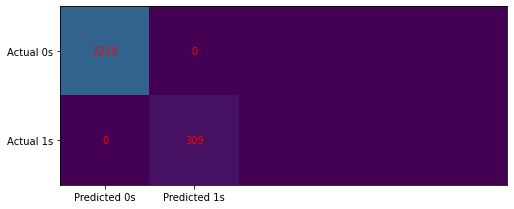

In [ ]:
cm = confusion_matrix(Y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(Y, model.predict(X)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2219
           2       1.00      1.00      1.00       309
           3       1.00      1.00      1.00       734
           4       1.00      1.00      1.00      1256
           5       1.00      1.00      1.00      7013

    accuracy                           1.00     11531
   macro avg       1.00      1.00      1.00     11531
weighted avg       1.00      1.00      1.00     11531



SVM - SUPPORT VECTOR MACHINES



In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [ ]:
plt.gray()

plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, shuffle = True)

In [ ]:
classifier = svm.SVC()


In [ ]:
classifier.fit(X_train, Y_train)

SVC()

In [ ]:
predict = classifier.predict(X_valid)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       428
           2       1.00      1.00      1.00        69
           3       1.00      1.00      1.00       131
           4       1.00      1.00      1.00       259
           5       1.00      1.00      1.00      1420

    accuracy                           1.00      2307
   macro avg       1.00      1.00      1.00      2307
weighted avg       1.00      1.00      1.00      2307



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


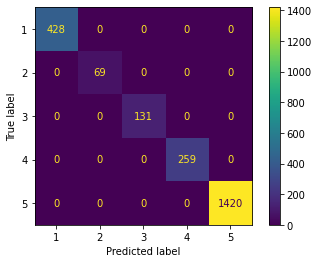

In [ ]:
print(metrics.classification_report(Y_valid, predict))
metrics.plot_confusion_matrix(classifier, X_valid, Y_valid)

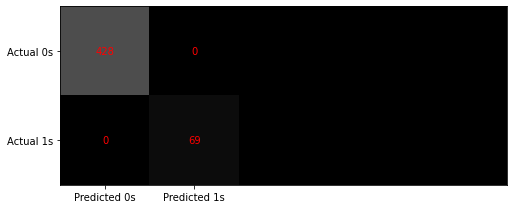

In [ ]:
cm = confusion_matrix(Y_valid, predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
import wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
sss = tfidf.get_feature_names_out()
list(sss)
mystring = " ".join(sss)
print(mystring)

abernook able absolute absolutely abundance abused access accustomed acidic actually add added adequate adverse advised aeropress affordability aftertaste aging ago ahead air alarm alert almost along already alright also although always amazon amount another answer antigua anything approx approximates arabica area aroma around arrived art artificial ask assumes atitlan attach aug available average avoid awake away awful baby back bad badly bag ball band bar barista base basically bc bean beat becasue become becomes behind belle bend best better beware big bigger biggest bit bitter bitterness black blade blame bland blend blind bloated blood blown blueberry bob bodied bold bomb boost boring bother bottom bought bow box brag brand branded breaking breezewood brew brewed brewing broke broken brown bubble buck buffer built bulk burnt burr buy buying cafe caffeine calibrate called camaro came canned canvas car caramel carb carmel carry case cat catch certainly changed channeling charge chea

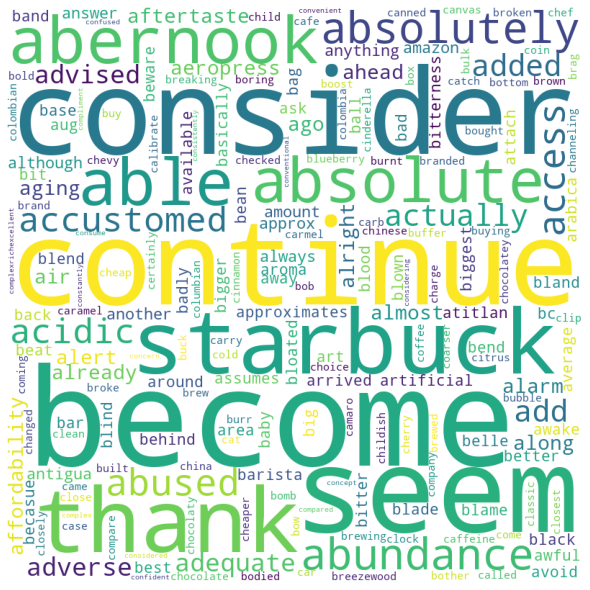

In [ ]:

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(mystring)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()